# 1 图

## 1.1 NetworkX

- 为了表示图，我们将使用一个名为NetworkX的包，它是Python中最常用的Network库。你可以在 https://networkx.org 上阅读更多关于它的信息。
- 我们可以通过导入NetworkX（通常导入为nx）。
- 首先导入画图和NetworkX包。

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx

## 1.2 无向图

- 实例化nx.Graph来创建一个无向图。这里我们多创造一个无向图，记为G1和G2

In [3]:
G1 = nx.Graph()
G2 = nx.Graph()

- 此时，G是一个没有节点和边的Graph（无向图）对象。
- 我们可以使用add_node方法添加节点。

In [4]:
G1.add_node(1)
G2.add_node(10)

- 也可以从任何 iterable 容器添加节点，如列表。

In [5]:
G1.add_nodes_from([2, 3])
G2.add_nodes_from([1, 3])

- 如果容器产生2个元组形式，还可以添加节点和节点属性 (node, node_attribute_dict)。

In [6]:
G1.add_nodes_from([
				(4, {"color": "red"}),
				(5, {"color": "green"}),
				])
G2.add_nodes_from([
				(6, {"color": "blank"}),
				(7, {"color": "purple"}),
				])

- 现在我们可以使用nodes方法得到一个节点列表。

In [7]:
print(list(G1.nodes()))
print(list(G2.nodes()))

[1, 2, 3, 4, 5]
[10, 1, 3, 6, 7]


- nodes方法返回一个节点视图，可以在for循环中使用，在本例中用于创建列表。
- 添加边的工作原理大致相同。
- 可以通过一次添加一个边来生长。

In [8]:
G1.add_edge(1, 2)
e = (2, 3)
G1.add_edge(*e)

G2.add_edge(6, 7)
e = (6, 7)
G2.add_edge(*e)

- 也可以添加边列表。

In [9]:
G1.add_edges_from([(1, 3), (2, 4)])
G1.add_edges_from([(1, 3), (2, 4)])

- 我们可以用edges来得到边的列表。

In [11]:
print(list(G1.edges()))
print(list(G2.edges()))

[(1, 2), (1, 3), (2, 3), (2, 4)]
[(6, 7)]


- 查看节点和边的数量。

In [13]:
print(G1.number_of_nodes())
print(G2.number_of_nodes())

5
5


In [12]:
print(G1.number_of_edges())
print(G2.number_of_edges())

4
1


- 查看节点的邻居。

In [14]:
print(list(G1.adj[1])) # or list(G.neighbors(1))
print(list(G2.adj[1]))

[2, 3]
[]


- 查看节点的度。

In [15]:
print(G1.degree[1])
# 以下是我的修改：
print(G1.degree[2])
print(G1.degree[3])

2
3
2


- NetworkX提供了多种绘图功能。
- draw_circular将节点排列成一个圆圈，并将它们与边连接起来。

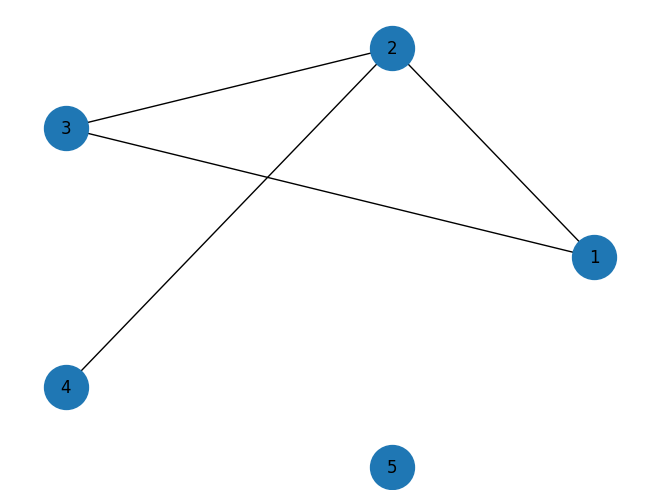

In [16]:
nx.draw_circular(G1,
                 node_color='C0',
                 node_size=1000,
                 with_labels=True)

以下是图2的图示

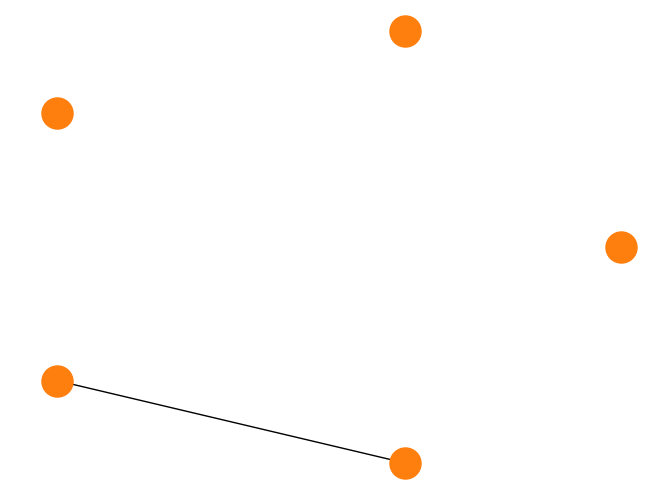

In [17]:
nx.draw_circular(G2,
                 node_color='C1',
                 node_size=500,
                 with_labels=False)

- 可以用与添加类似的方式从图形中删除节点和边。

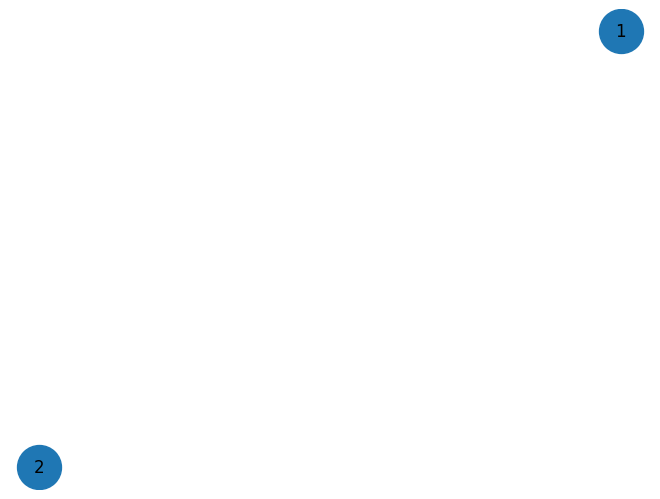

In [18]:
G1.remove_node(5)
G1.remove_nodes_from([3, 4])
G1.remove_edge(1, 2)

nx.draw_circular(G1,
                 node_color='C0',
                 node_size=1000,
                 with_labels=True)

- 除了视图 Graph.edges 和 Graph.adj，可以使用下标表示法访问边和邻居。

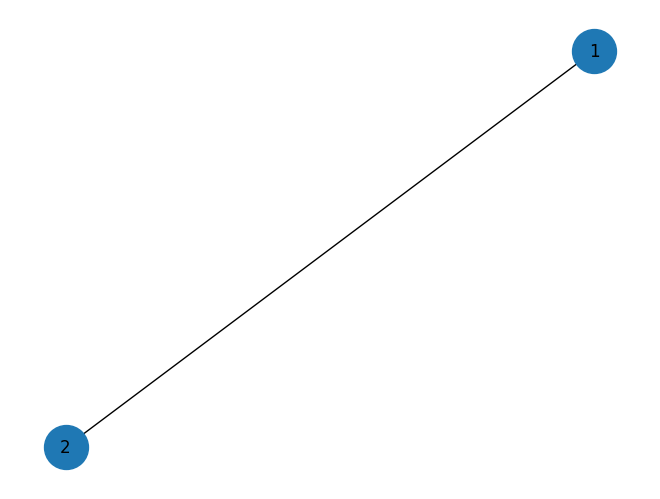

In [19]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
nx.draw_circular(G,
                 node_size=1000,
                 with_labels=True)

In [22]:
G[1]  # same as G.adj[1]
G[2]  # 与G.adj[2]相同

AtlasView({2: {'color': 'yellow'}})

In [21]:

G[1][2]

{'color': 'yellow'}

- 从一个字典开始，将每个城市的名称映射到它的近似经度和纬度。

In [20]:
positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

- 由于这是一个无向图，实例化了nx.Graph。

In [23]:
G = nx.Graph()

- 然后可以使用add_nodes_from来迭代positions（位置）的键，并将它们添加为节点。

In [28]:
G.add_nodes_from(positions)

- 接下来要做一个字典，从每条边映射到相应的驾驶时间。
修改： 加上从Albany到Philly的路线

In [24]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2,
               ('Albany','Philly'):5}

- 现在可以使用add_edges_from，它迭代drive_times的键并将它们添加为边。

In [25]:
G.add_edges_from(drive_times)

- 我将使用draw代替draw_circular，它以位置字典作为第二个参数来排列一个圆圈中的节点。

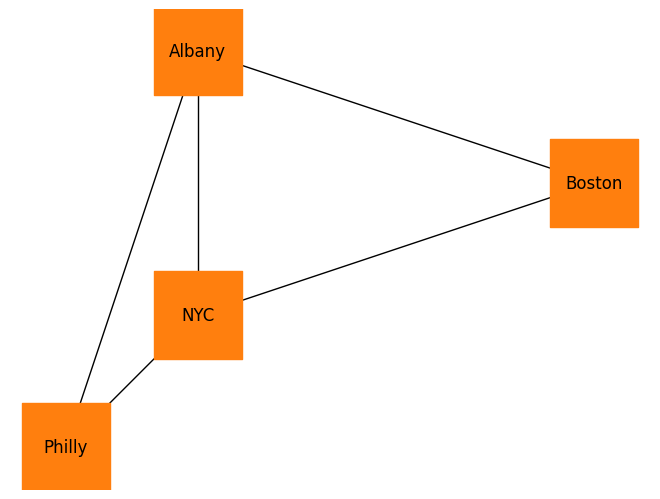

In [26]:
nx.draw(G, positions,
        node_color='C1',
        node_shape='s',
        #以下是我的修改，把2500改成4000.
        node_size=4000,
        with_labels=True)

- draw使用positions来确定节点的位置。
- 要添加边标签，我们使用draw_networkx_edge_labels。

FileNotFoundError: [Errno 2] No such file or directory: 'figs/exp1-1.png'

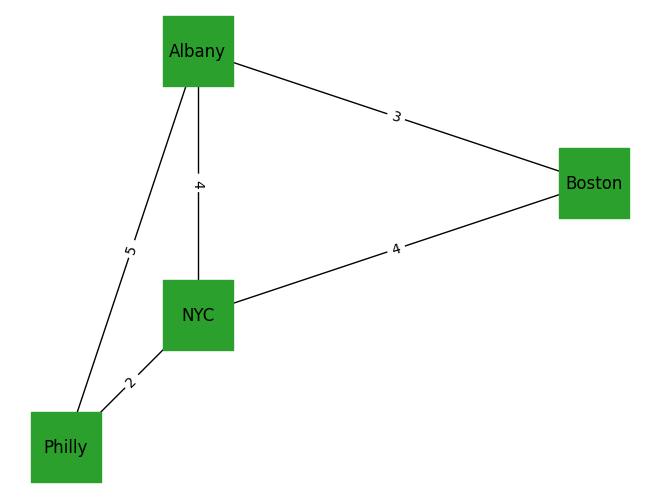

In [27]:
nx.draw(G, positions, 
        node_color='C2', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('figs/exp1-1')

- edge_labels参数需要一个从每对节点映射到标签的字典；
- 在这里，标签是在城市之间驾车的行驶时间。

## 1.3 有向图

- 实例化nx.DiGraph来创建一个有向图。

In [28]:

DG = nx.DiGraph()

- 此时，DG是一个没有节点和边的DiGraph（有向图）对象。我们可以使用add_node方法添加节点。


In [29]:
DG.add_node('Alice')
DG.add_node('Bob')
DG.add_node('Chuck')

- 现在我们可以使用nodes方法得到一个节点列表。

In [30]:
list(DG.nodes())

['Alice', 'Bob', 'Chuck']

- 添加边的工作原理大致相同：

In [31]:
DG.add_edge('Alice', 'Bob')
DG.add_edge('Alice', 'Chuck')
DG.add_edge('Bob', 'Alice')
DG.add_edge('Bob', 'Chuck')

- 我们可以用edges来得到边的列表。

In [32]:
list(DG.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

- 我们用draw_circular将节点排列成一个圆圈，并将它们与边连接起来。

FileNotFoundError: [Errno 2] No such file or directory: 'figs/exp1-2.png'

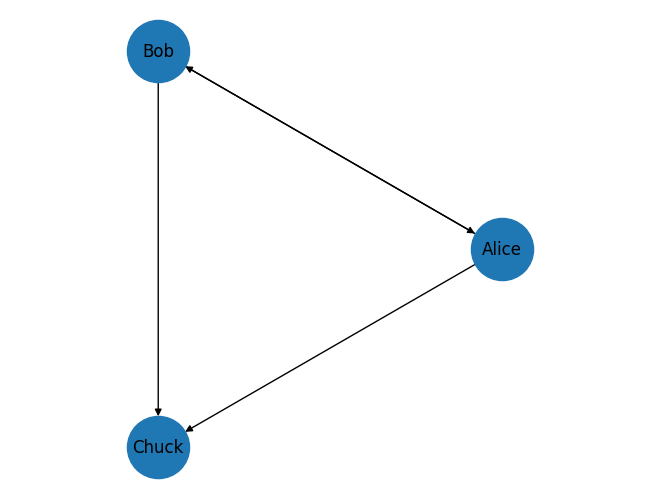

In [33]:
nx.draw_circular(DG,
                 node_color='C0',
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.savefig('figs/exp1-2')

## 1.4 绘图实验

- 简单路径

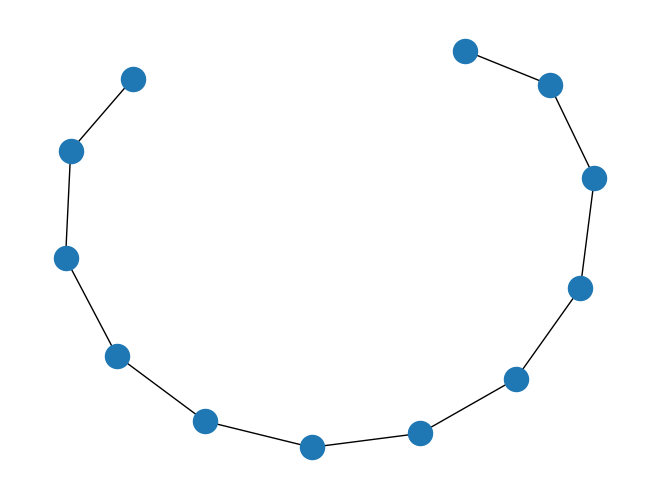

In [45]:
# 以下是我的修改，将8改成12。
G = nx.path_graph(12)
nx.draw(G)

- 按度数对节点进行着色(颜色改成了绿色)

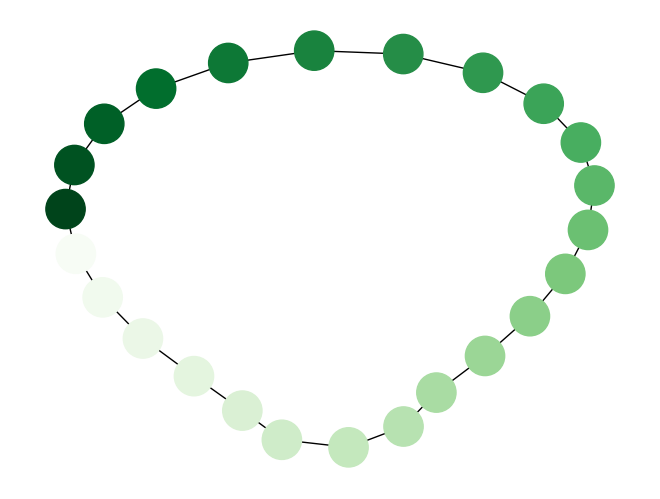

In [34]:
G = nx.cycle_graph(24)
pos = nx.spring_layout(G, iterations=200)
nx.draw(G, pos, node_color=range(24), node_size=800, cmap=plt.cm.Greens)# 颜色改成绿色
plt.show()

- 对边进行着色绘制图形

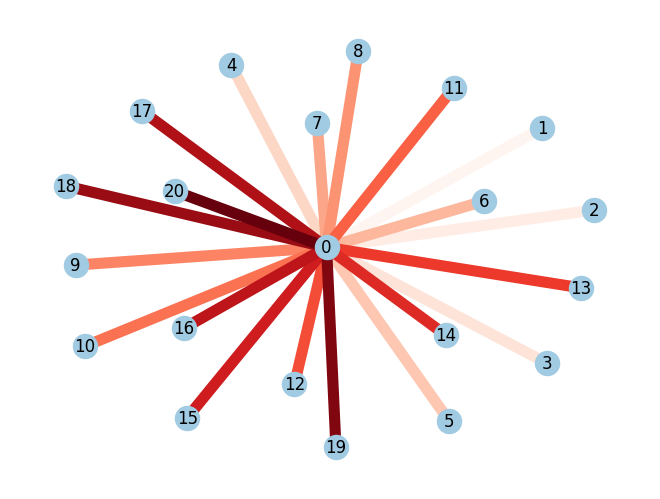

In [35]:
G = nx.star_graph(20)
pos = nx.spring_layout(G)
colors = range(20)
options = {
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "width": 8, # 宽度由4变为8
    "edge_cmap": plt.cm.Reds, #连线变成红色
    "with_labels": True, #加上标号
}
nx.draw(G, pos, **options)
plt.show()

- 绘制网格图

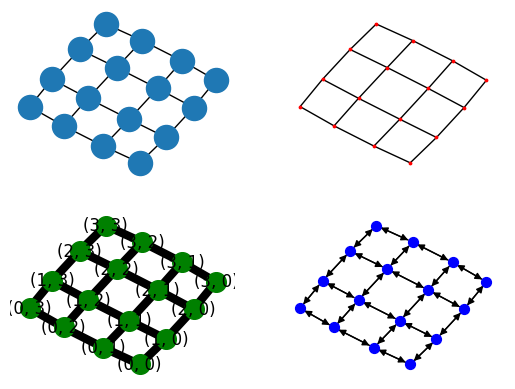

In [36]:
#更改了程序中的一些参数，例如点的大小，有无标签等等。
G = nx.grid_2d_graph(4, 4)  # 4x4 grid

pos = nx.spring_layout(G, iterations=100)

plt.subplot(221)
nx.draw(G, pos, font_size=4) #将size改小成4

plt.subplot(222)
nx.draw(G, pos, node_color="r", node_size=3, with_labels=False)

plt.subplot(223)
nx.draw(G, pos, node_color="g", node_size=200, with_labels=True, width=6)

plt.subplot(224)
H = G.to_directed()
nx.draw(H, pos, node_color="b", node_size=50, with_labels=False)

plt.show()

- 完全图
- 为了生成完全图，我们使用了一个遍历所有节点对的生成器函数。

In [37]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

- 定义 `make_complete_graph` 函数生成一个用给定节点数和所有节点对之间的边数的图

In [38]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

- 下面是一个包含10个节点的完整图

In [39]:
complete = make_complete_graph(10)
complete.number_of_nodes()

10

- 绘制完全图

FileNotFoundError: [Errno 2] No such file or directory: 'figs/exp1-3.png'

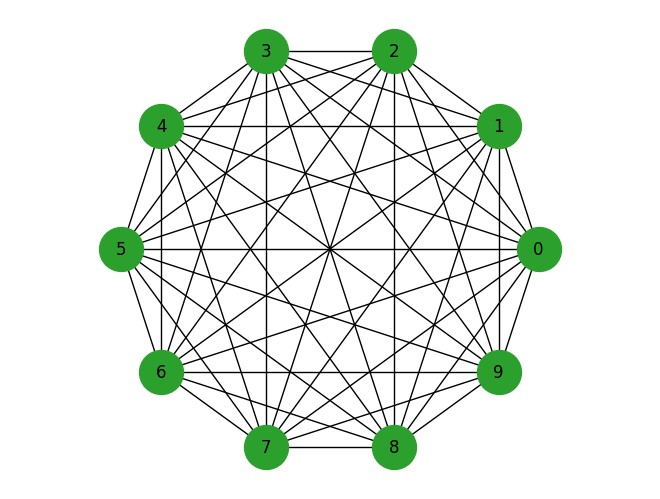

In [40]:
nx.draw_circular(complete, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('figs/exp1-3')

- 也可以用 `complete_graph` 方法生成完全图

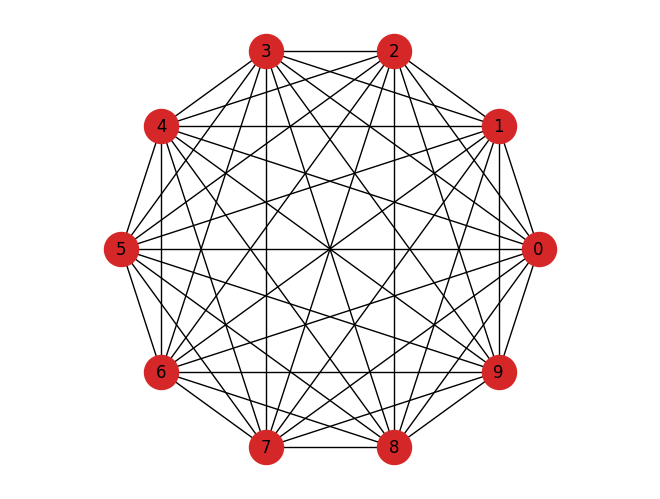

In [41]:
G = nx.complete_graph(10)
nx.draw_circular(G, 
                 node_color='C3', 
                 node_size=600, 
                 with_labels=True)
plt.axis('equal');

以下为简单的邻接矩阵应用：

In [45]:
Graph=nx.Graph()
Graph.add_nodes_from([1,2,3,4])
Adjacency=nx.adjacency_matrix(Graph)
print(Adjacency.todense())

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


接下来做一些边的连接

In [48]:
Graph.add_edges_from([(1,2),(2,3),(1,4)])
Adjacency=nx.adjacency_matrix(Graph)
print(Adjacency.todense())

[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]
